# Practice 1

## Гришин Константин 8303

In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import linprog

import matplotlib.pyplot as plt

from functools import reduce

In [2]:
# 1.4.3
C1 = np.array([
    [2, 2, 6, 5],
    [3, 3, 7, 7],
    [4, 3, 4, 2],
    [5, 6, 2, 4],
])

# 1.5.3
C2 = np.array([
    [2, 7],
    [4, 3],
])

# 1.6.3
C3 = np.array([
    [3, 6, 1, 4, 2],
    [5, 2, 4, 2, 7],
])

# 1.7.3
C4 = np.array([
    [4, 8],
    [3, 4],
    [6, 5],
    [7, 2],
    [6, 3],
])

# 1.8.3
C5 = np.array([
    [2, 1, 3],
    [5, 2, 4],
    [3, 7, 5],
])


def intersection(a1, a2, b1, b2):
    x1, x2, x3, x4 = a1[0], a2[0], b1[0], b2[0]
    y1, y2, y3, y4 = a1[1], a2[1], b1[1], b2[1]

    d = (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4)
    t = ((x1-x3)*(y3-y4)-(y1-y3)*(x3-x4))/d
    u = ((x1-x3)*(y1-y2)-(y1-y3)*(x1-x2))/d

    if 0.0<=t<=1.0 and 0.0<=u<=1.0:
        return (x1+t*(x2-x1), y1+t*(y2-y1))
    return None



def draw_to_x_axes(point, fmt="-"):
    plt.plot((point[0], point[0]), (point[1], 0), fmt)

def draw_to_y_axes(point, fmt="-"):
    plt.plot((point[0], 0), (point[1], point[1]), fmt)

def point_side(a1, a2, point):
    v1 = (a2[0] - a1[0], a2[1] - a1[1])
    v2 = (point[0] - a1[0], point[1] - a1[1])
    xp = v1[0]*v2[1]-v1[1]*v2[0]
    if abs(xp) < 0.00001: return 0
    elif xp > 0: return 1
    elif xp < 0: return -1
    return 0

def calculate_error(approx, real):
    return np.abs(approx - real) / real


## Определеить границы выигрыша и наличие седловой точки С1

In [3]:
C1

array([[2, 2, 6, 5],
       [3, 3, 7, 7],
       [4, 3, 4, 2],
       [5, 6, 2, 4]])

In [4]:
def matrix_limits(matrix):
    return (
        max(np.apply_along_axis(lambda x: min(x), axis=1, arr=matrix)),
        min(np.apply_along_axis(lambda x: max(x), axis=0, arr=matrix))
    )

In [5]:
maxmin = max(np.apply_along_axis(lambda x: min(x), axis=1, arr=C1))
print(f"{maxmin=}")

maxmin=3


In [6]:
minmax = min(np.apply_along_axis(lambda x: max(x), axis=0, arr=C1))
print(f"{minmax=}")

minmax=5


Седловой точки нет. Границы выигрыша (3, 5)

## Графически и аналитически решить матричную игру 2x2 для матрицы C2

In [7]:
C2

array([[2, 7],
       [4, 3]])

(0.3333333333333333, 3.6666666666666665)


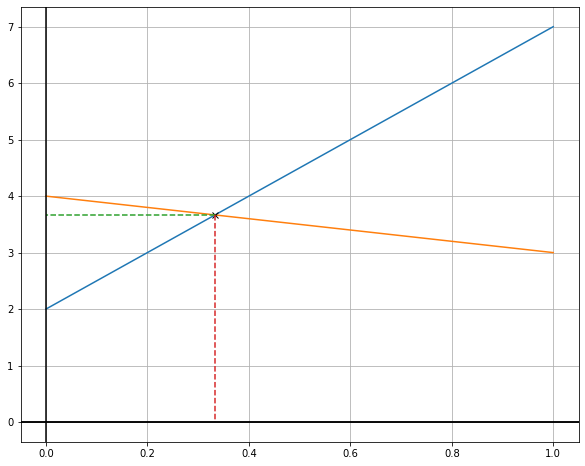

In [8]:
plt.figure(figsize=(10, 8))

# draw lines
plt.plot([0, 1], C2[0])
plt.plot([0, 1], C2[1])

# find intersection
cross = intersection(
    (0, C2[0][0]),
    (1, C2[0][1]),
    (0, C2[1][0]),
    (1, C2[1][1]),
)
print(cross)

# draw intersection
plt.plot(cross[0], cross[1], "kx")
draw_to_y_axes(cross, '--')
draw_to_x_axes(cross, '--')

# beutify plot
plt.axhline(0, color='black')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True, "both")

# shot plot
plt.show()


(0.8333333333333334, 3.666666666666667)


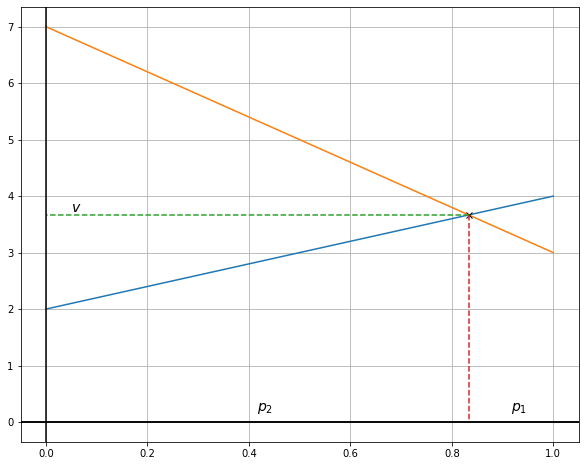

In [33]:
plt.figure(figsize=(10, 8))

# draw lines
plt.plot([0, 1], C2.T[0])
plt.plot([0, 1], C2.T[1])

# find intersection
cross = intersection(
    (0, C2.T[0][0]),
    (1, C2.T[0][1]),
    (0, C2.T[1][0]),
    (1, C2.T[1][1]),
)
print(cross)

# draw intersection
plt.plot(cross[0], cross[1], "kx")
plt.text(0.05, cross[1] + 0.05, '$v$', fontsize=14)
plt.text(cross[0] / 2, 0.2, '$p_2$', fontsize=14)
plt.text((cross[0] + 1) / 2, 0.2, '$p_1$', fontsize=14)
draw_to_y_axes(cross, '--')
draw_to_x_axes(cross, '--')

# beutify plot
plt.axhline(0, color='black')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True, "both")

# shot plot
plt.show()


In [40]:
c2_p1 = (C2[1][1]-C2[1][0])/(C2[0][0]+C2[1][1]-(C2[0][1]+C2[1][0]))
c2_p2 = (C2[0][0]-C2[0][1])/(C2[0][0]+C2[1][1]-(C2[0][1]+C2[1][0]))
c2_v  = (C2[0][0]*C2[1][1]-C2[0][1]*C2[1][0])/(C2[0][0]+C2[1][1]-(C2[0][1]+C2[1][0]))
c2_q1 = (C2[1][1]-C2[0][1])/(C2[0][0]+C2[1][1]-(C2[0][1]+C2[1][0]))
c2_q2 = (C2[0][0]-C2[1][0])/(C2[0][0]+C2[1][1]-(C2[0][1]+C2[1][0]))

print(f"({C2[1][1]}-{C2[1][0]})/({C2[0][0]}+{C2[1][1]}-({C2[0][1]}+{C2[1][0]}))")
print(f"({C2[0][0]}-{C2[0][1]})/({C2[0][0]}+{C2[1][1]}-({C2[0][1]}+{C2[1][0]}))")
print(f"({C2[0][0]}*{C2[1][1]}-{C2[0][1]}*{C2[1][0]})/({C2[0][0]}+{C2[1][1]}-({C2[0][1]}+{C2[1][0]}))")

print("v ~", 3.7)
print("p1 ~", 1 - 0.82)
print("p2 ~", 0.82)
print("delta(v) =", calculate_error(3.7, c2_v))
print("delta(p1) =", calculate_error(1 - 0.82, c2_p1))
print("delta(p2) =", calculate_error(0.82, c2_p2))

pd.DataFrame(data={
    "p1": [c2_p1],
    "p2": [c2_p2],
    "q1": [c2_q1],
    "q2": [c2_q2],
    "v":  [c2_v],
}).round(3)

(3-4)/(2+3-(7+4))
(2-7)/(2+3-(7+4))
(2*3-7*4)/(2+3-(7+4))
v ~ 3.7
p1 ~ 0.18000000000000005
p2 ~ 0.82
delta(v) = 0.00909090909090918
delta(p1) = 0.08000000000000035
delta(p2) = 0.0160000000000001


,p1,p2,q1,q2,v
0,0.167,0.833,0.667,0.333,3.667


## Графически и аналитически решить матричную игру 2xN для матрицы C3

In [11]:
C3

array([[3, 6, 1, 4, 2],
       [5, 2, 4, 2, 7]])

In [12]:
pd.DataFrame(data={
    "maxmin": [max(np.apply_along_axis(lambda x: min(x), axis=1, arr=C3))],
    "minmax": [min(np.apply_along_axis(lambda x: max(x), axis=0, arr=C3))],
})

,maxmin,minmax
0,2,4


In [13]:
def minimal_pairs(pairs):
    minimal = []
    for vec in pairs:
        ignore = False
        remove_indices = []
        for index, min_vec in enumerate(minimal):
            if vec[0] >= min_vec[0] and vec[1] >= min_vec[1]:
                ignore = True
                break
            elif vec[0] <= min_vec[0] and vec[1] <= min_vec[1]:
                remove_indices.append(index)
        for index in sorted(remove_indices, reverse=True):
            del minimal[index]
        if not ignore:
            minimal.append(vec)
    return minimal


(0.6, 2.8)


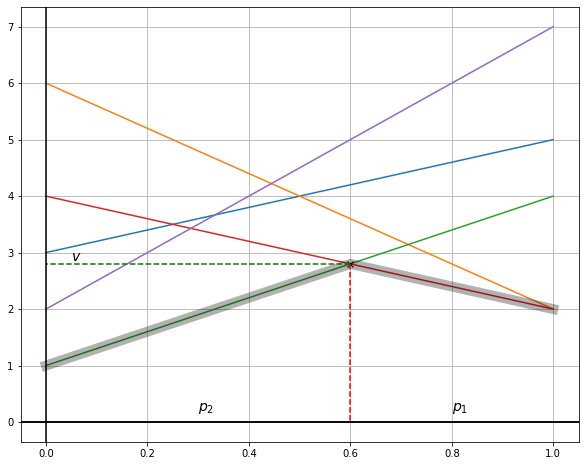

In [34]:

plt.figure(figsize=(10, 8))

minimal = minimal_pairs(C3.T)
first = (0, min(vec[0] for vec in minimal))
last = (1, min(vec[1] for vec in minimal))

for line in C3.T:
    plt.plot([0, 1], line)
    
added = []
crosses = []
for line in minimal:
    for line__ in added:
        cross = intersection((0, line[0]),(1, line[1]),(0, line__[0]),(1, line__[1]))
        if cross:
            crosses.append(cross)
            plt.plot(cross[0], cross[1], "kx")
    added.append(line)

def check_point(point):
    for line in minimal:
        if point_side((0, line[0]), (1, line[1]), point) > 0:
            return False
    return True

crosses = list(filter(check_point, crosses))
crosses.sort(key=lambda v: v[0])

def reducer(a, b):
    if a[1] > b[1]: return a
    else: return b

v_cross = reduce(reducer, crosses)

crosses.insert(0, first)
crosses.append(last)

print(cross)

plt.plot(
    [vec[0] for vec in crosses],
    [vec[1] for vec in crosses],
    "black", linewidth=10, alpha=0.3
)

plt.text(0.05, v_cross[1] + 0.05, '$v$', fontsize=14)
plt.text(v_cross[0] / 2, 0.2, '$p_2$', fontsize=14)
plt.text((v_cross[0] + 1) / 2, 0.2, '$p_1$', fontsize=14)
draw_to_x_axes(v_cross, "r--")
draw_to_y_axes(v_cross, "g--")

plt.axhline(0, color='black')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True, "both")
plt.show()

In [39]:
# 2 and 3 form a mixed strategy
c3_p1 = (C3[1][2]-C3[1][3])/(C3[0][3]+C3[1][2]-(C3[0][2]+C3[1][3]))
c3_p2 = (C3[0][3]-C3[0][2])/(C3[0][3]+C3[1][2]-(C3[0][2]+C3[1][3]))
c3_v  = (C3[0][3]*C3[1][2]-C3[0][2]*C3[1][3])/(C3[0][3]+C3[1][2]-(C3[0][2]+C3[1][3]))

print(f"({C3[1][2]}-{C3[1][3]})/({C3[0][3]}+{C3[1][2]}-({C3[0][2]}+{C3[1][3]}))")
print(f"({C3[0][3]}-{C3[0][2]})/({C3[0][3]}+{C3[1][2]}-({C3[0][2]}+{C3[1][3]}))")
print(f"({C3[0][3]}*{C3[1][2]}-{C3[0][2]}*{C3[1][3]})/({C3[0][3]}+{C3[1][2]}-({C3[0][2]}+{C3[1][3]}))")

print("v ~", 2.8)
print("p1 ~", 1 - 0.6)
print("p2 ~", 0.6)
print("delta(v) =", calculate_error(2.8, c3_v))
print("delta(p1) =", calculate_error(1 - 0.6, c3_p1))
print("delta(p2) =", calculate_error(0.6, c3_p2))

pd.DataFrame(data={
    "p1": [c3_p1],
    "p2": [c3_p2],
    "v":  [c3_v],
}).round(3)

(4-2)/(4+4-(1+2))
(4-1)/(4+4-(1+2))
(4*4-1*2)/(4+4-(1+2))
v ~ 2.8
p1 ~ 0.4
p2 ~ 0.6
delta(v) = 0.0
delta(p1) = 0.0
delta(p2) = 0.0


,p1,p2,v
0,0.4,0.6,2.8


## Графически и аналитически решить матричную игру Nx2 для матрицы C4

In [16]:
C4

array([[4, 8],
       [3, 4],
       [6, 5],
       [7, 2],
       [6, 3]])

In [17]:
pd.DataFrame(data={
    "maxmin": [max(np.apply_along_axis(lambda x: min(x), axis=1, arr=C4))],
    "minmax": [min(np.apply_along_axis(lambda x: max(x), axis=0, arr=C4))],
})

,maxmin,minmax
0,5,7


In [18]:
def maximal_pairs(pairs):
    maximal = []
    for vec in pairs:
        ignore = False
        remove_indices = []
        for index, min_vec in enumerate(maximal):
            if vec[0] <= min_vec[0] and vec[1] <= min_vec[1]:
                ignore = True
                break
            elif vec[0] >= min_vec[0] and vec[1] >= min_vec[1]:
                remove_indices.append(index)
        for index in sorted(remove_indices, reverse=True):
            del maximal[index]
        if not ignore:
            maximal.append(vec)
    return maximal

(0.4, 5.6)


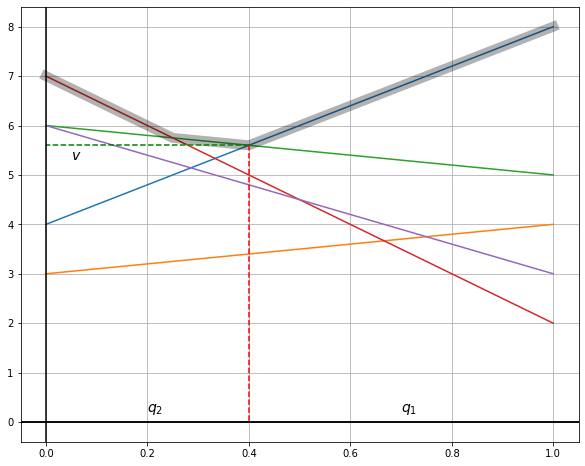

In [38]:
plt.figure(figsize=(10, 8))

maximal = maximal_pairs(C4)
first = (0, max(vec[0] for vec in maximal))
last = (1, max(vec[1] for vec in maximal))

for line in C4:
    plt.plot([0, 1], line)
    
added = []
crosses = []
for line in maximal:
    for line__ in added:
        cross = intersection((0, line[0]),(1, line[1]),(0, line__[0]),(1, line__[1]))
        if cross: crosses.append(cross)
    added.append(line)

def check_point(point):
    for line in maximal:
        if point_side((0, line[0]), (1, line[1]), point) < 0:
            return False
    return True

crosses = list(filter(check_point, crosses))
crosses.sort(key=lambda v: v[0])

def reducer(a, b):
    if a[1] < b[1]: return a
    else: return b

v_cross = reduce(reducer, crosses)

crosses.insert(0, first)
crosses.append(last)

print(v_cross)

plt.plot(
    [vec[0] for vec in crosses],
    [vec[1] for vec in crosses],
    "black", linewidth=10, alpha=0.3
)

plt.text(0.05, v_cross[1] - 0.3, '$v$', fontsize=14)
plt.text(v_cross[0] / 2, 0.2, '$q_2$', fontsize=14)
plt.text((v_cross[0] + 1) / 2, 0.2, '$q_1$', fontsize=14)
draw_to_x_axes(v_cross, "r--")
draw_to_y_axes(v_cross, "g--")

plt.axhline(0, color='black')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True, "both")
plt.show()

In [41]:
# 0 and 2 form a mixed strategy
c4_q1 = (C4[0][1]-C4[2][1])/(C4[2][0]+C4[0][1]-(C4[2][1]+C4[0][0]))
c4_q2 = (C4[2][0]-C4[0][0])/(C4[2][0]+C4[0][1]-(C4[2][1]+C4[0][0]))
c4_v  = (C4[0][1]*C4[2][0]-C4[2][1]*C4[0][0])/(C4[2][0]+C4[0][1]-(C4[2][1]+C4[0][0]))

print(f"({C4[0][1]}-{C4[2][1]})/({C4[2][0]}+{C4[0][1]}-({C4[2][1]}+{C4[0][0]}))")
print(f"({C4[2][0]}-{C4[0][0]})/({C4[2][0]}+{C4[0][1]}-({C4[2][1]}+{C4[0][0]}))")
print(f"({C4[0][1]}*{C4[2][0]}-{C4[2][1]}*{C4[0][0]})/({C4[2][0]}+{C4[0][1]}-({C4[2][1]}+{C4[0][0]}))")

print("v ~", 5.6)
print("q1 ~", 1 - 0.4)
print("q2 ~", 0.4)
print("delta(v) =", calculate_error(5.6, c4_v))
print("delta(q1) =", calculate_error(1 - 0.4, c4_q1))
print("delta(q2) =", calculate_error(0.4, c4_q2))

pd.DataFrame(data={
    "q1": [c4_q1],
    "q2": [c4_q2],
    "v":  [c4_v],
}).round(3)

(8-5)/(6+8-(5+4))
(6-4)/(6+8-(5+4))
(8*6-5*4)/(6+8-(5+4))
v ~ 5.6
q1 ~ 0.6
q2 ~ 0.4
delta(v) = 0.0
delta(q1) = 0.0
delta(q2) = 0.0


,q1,q2,v
0,0.6,0.4,5.6


## С помощью симплекс-метода решить матричную игру MxN для матрицы C5 

In [21]:
C5

array([[2, 1, 3],
       [5, 2, 4],
       [3, 7, 5]])

In [22]:
pd.DataFrame(data={
    "maxmin": [max(np.apply_along_axis(lambda x: min(x), axis=1, arr=C5))],
    "minmax": [min(np.apply_along_axis(lambda x: max(x), axis=0, arr=C5))],
})

,maxmin,minmax
0,3,5


$2p_1+5p_2+3p_3 \geq V$

$1p_1+2p_2+7p_3 \geq V$

$3p_1+4p_2+5p_3 \geq V$

$1p_1+1p_2+1p_3 = 1$

-----------------------
divide both sides by $V$, replace: $x_i=p_i/V$

$2x_1+5x_2+3x_3 \geq 1$

$1x_1+2x_2+7x_3 \geq 1$

$3x_1+4x_2+5x_3 \geq 1$

$1x_1+1x_2+1x_3 = 1/V$

-----------------------
maximize $V$ i.e. minimize $Z = 1/V$

$2x_1+5x_2+3x_3 \geq 1$

$1x_1+2x_2+7x_3 \geq 1$

$3x_1+4x_2+5x_3 \geq 1$

$1x_1+1x_2+1x_3 = Z$

$Z \rightarrow min$

Linear programming problem

In [42]:
def solve_matrix(matrix):
    objective_funciton_coefs = np.array([1, 1, 1])
    constraint_matrix = matrix.T * -1
    constraint_vector = np.array([-1, -1, -1])
    return linprog(
        objective_funciton_coefs,
        A_ub=constraint_matrix,
        b_ub=constraint_vector
    )

In [44]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
result = solve_matrix(C5)

print(result)

print("V =", 1/result.fun)
print("p =", result.x/result.fun)


     con: array([], dtype=float64)
     fun: 0.2413793105018628
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([4.65081751e-10, 5.05731013e-10, 6.89655179e-02])
  status: 0
 success: True
       x: array([7.15970367e-11, 1.37931035e-01, 1.03448276e-01])
V = 4.142857140161906
p = [2.96616295e-10 5.71428571e-01 4.28571429e-01]
